In [1]:
import neo
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
r = neo.AxonIO(filename=data_file_extra)
block = r.read_block()
segment = block.segments[0]
nerve = segment.analogsignals[0]
type(nerve)

NameError: name 'data_file_extra' is not defined

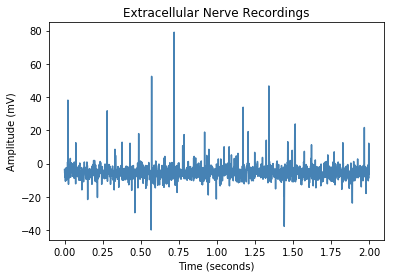

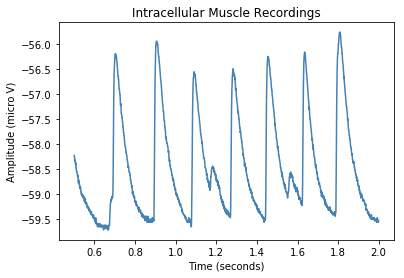

In [23]:
data_file_extra='lab4/data/19925001.abf'
data_file_intra='lab3/data/19918002.abf'


r = neo.AxonIO(filename=data_file_extra)
block = r.read_block()
segment = block.segments[0]
nerve = segment.analogsignals[0]
nerve_unit = nerve.units.dimensionality.string
sample_period = nerve.sampling_period
sample_period_unit = sample_period.units.simplified.dimensionality.string
times = np.asarray(nerve.times)
nerve = np.asarray(nerve)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV)")
plt.title("Extracellular Nerve Recordings")
plt.plot(times[:20000:10], nerve[:20000:10], color='steelblue')

r = neo.AxonIO(filename=data_file_intra)
block = r.read_block()
segment = block.segments[0]
muscle = segment.analogsignals[0]
times = np.asarray(muscle.times)
muscle = np.asarray(muscle)

plt.figure()
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (micro V)")
plt.title("Intracellular Muscle Recordings")
plt.plot(times[5000:20000:10], muscle[5000:20000:10], color='steelblue')


In [46]:
nerve=nerve[:800000]

In [47]:
from scipy.signal import medfilt
from scipy.ndimage import label
from sklearn.cluster import KMeans
def peak_detection(ts,filt=False):
    if filt:
        baseline = medfilt(ts, kernel_size=801)
        ts-=baseline
    above_thresh=ts>(ts.mean()+3*ts.std())
    labs,nlabs = label(above_thresh)
    peak_idxs = []
    for l in range(1,nlabs+1):
        idxs = np.where(labs==l)[0]
        vals = ts[idxs]
        peak_idx = idxs[np.argmax(vals)]
        peak_idxs.append(peak_idx)
    peak_heights = ts[peak_idxs]
    return peak_idxs,peak_heights

nerve_idxs,nerve_heights=peak_detection(nerve)

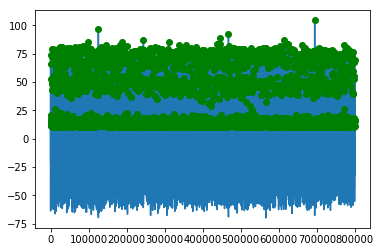

In [48]:
plt.plot(nerve)
plt.plot(nerve_idxs,nerve_heights,'go')

(array([331., 323., 389., 393., 358., 254., 186., 126.,  72.,  42.,  22.,
         14.,   3.,   3.,   0.,   1.,   1.,   1.,   0.,   2.,   0.,   0.,
          1.,   2.,   2.,   1.,   3.,   4.,   1.,   7.,  23.,  19.,  20.,
         25.,  23.,  23.,  26.,  33.,  24.,  35.,  32.,  32.,  30.,  30.,
         37.,  24.,  25.,  10.,  12.,   8.,   9.,   8.,  13.,  12.,  12.,
         29.,  15.,  20.,  26.,  30.,  29.,  23.,  29.,  35.,  20.,  31.,
         49.,  45.,  47.,  24.,  46.,  32.,  24.,  26.,  17.,  11.,   3.,
          9.,   0.,   3.,   0.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([ 10.07079983,  11.01379292,  11.95678602,  12.89977912,
         13.84277222,  14.78576531,  15.72875841,  16.67175151,
         17.61474461,  18.5577377 ,  19.5007308 ,  20.4437239 ,
         21.386717  ,  22.32971009,  23.27270319,  24.21569629,
         25.15868938,  26.10168248,  27.04467558,  27.98766868,

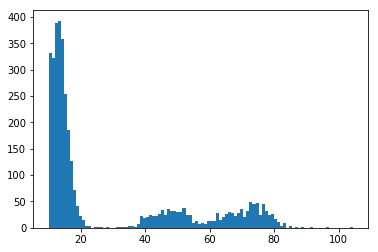

In [49]:
plt.hist(nerve_heights,bins=100)

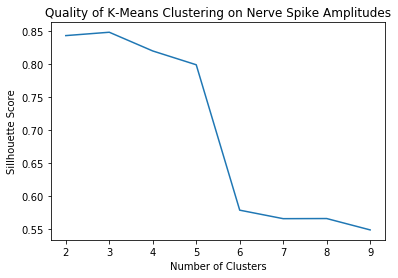

In [52]:
from sklearn.metrics import silhouette_score
scores=[]
X = nerve_heights.reshape([-1,1])
for n_cluster in range(2,10):
    km = KMeans(n_clusters=n_cluster).fit(X)
    scores.append(silhouette_score(X,km.labels_))
plt.ylabel("Sillhouette Score")
plt.xlabel("Number of Clusters")
plt.title("Quality of K-Means Clustering on Nerve Spike Amplitudes")
plt.plot(range(2,10),scores)

Text(0.5, 1.0, 'Extracellular Nerve Recordings with Spike Clusters')

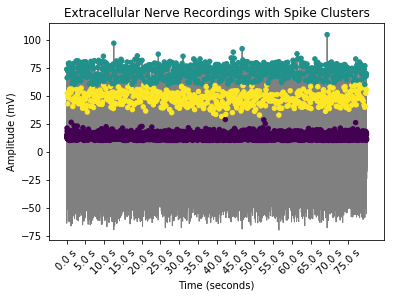

In [75]:
km = KMeans(n_clusters=3).fit(X)
plt.plot(nerve, color='gray', lw=1)
plt.scatter(nerve_idxs,nerve_heights,c=km.labels_,s=20,zorder=10)
plt.xticks(range(800000)[::50000],segment.analogsignals[0].times[:800000][::50000],rotation=45)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV)")
plt.title("Extracellular Nerve Recordings with Spike Clusters")

NameError: name 'nerve_times' is not defined

In [60]:
segment.analogsignals[0].times[:800000]

array([0.00000e+00, 1.00000e-04, 2.00000e-04, ..., 7.99997e+01,
       7.99998e+01, 7.99999e+01]) * s

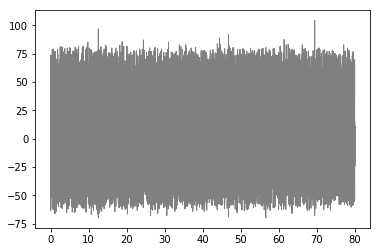

In [64]:
plt.plot(segment.analogsignals[0].times[:800000],nerve, color='gray',lw=1)